In [1]:
import pandas as pd
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d.art3d as art3d
import scipy.optimize as opt
%matplotlib inline

In [2]:
stars = pd.read_csv("estrellas.csv")

In [3]:
stars.tail()

,Nombre de la estrella,Luminosidad en unidades solares,Radio,Temperatura
83,HD 38529,6.60,2.44,5370
84,Tabit,2.60,2.70,6400
85,Alpha Centauri A,1.40,1.20,5790
86,Chi1 Orionis,1.05,1.05,5942
87,Sol,1.00,1.00,5778


In [4]:
stars.shape

(88, 4)

In [5]:
radio = stars[["Radio"]].values
temp = stars[["Temperatura"]].values
lum = stars[["Luminosidad en unidades solares"]].values

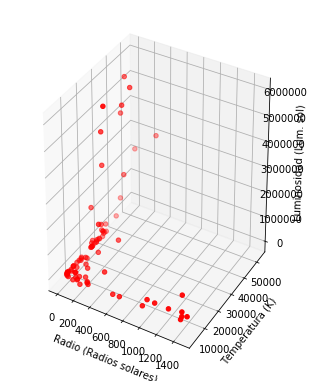

In [6]:
fig = plt.figure(figsize=(4,5))
ax = Axes3D(fig)
ax.scatter(radio, temp, lum ,c = "r", marker= 'o')
ax.set_xlabel("Radio (Radios solares)")
ax.set_ylabel("Temperatura (K)")
ax.set_zlabel("Luminosidad (Lum. sol)")
plt.show()

In [41]:
def fun_obj (beta,radio,temp, lum):
    return np.sum((lum-beta*radio**2*temp**4)**2)

In [42]:
beta_0= 3

In [43]:
res= opt.minimize(fun_obj, beta_0, args= (radio,temp,lum))
res.x

array([-7.45058044e-09])

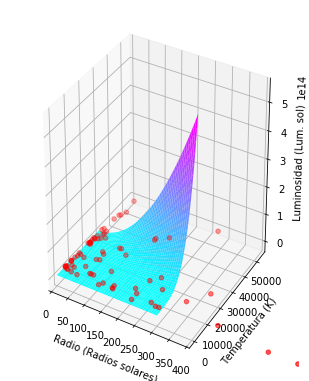

In [46]:
fig = plt.figure(figsize=(4,5))
ax = Axes3D(fig)
x= np.linspace(0,300)
y= np.linspace(0,30000)
X, Y = np.meshgrid(x, y)
Z = (-res.x)*X**2*Y**4 
ax.scatter(radio, temp, lum ,c = "r", marker= 'o')
ax.plot_surface(X, Y, Z,cmap = "cool" )
ax.set_xlabel("Radio (Radios solares)")
ax.set_ylabel("Temperatura (K)")
ax.set_zlabel("Luminosidad (Lum. sol)")
plt.xlim(xmin=0, xmax=400)
plt.show()